In [5]:
import matplotlib.pyplot as plt
import json
from typing import Optional

import dictionary_learning.utils as utils



In [6]:
TRAINER_LABELS = {
    "StandardTrainer": "Standard",
    "JumpReluTrainer": "JumpReLU",
    "TopKTrainer": "Top K",
    "BatchTopKTrainer": "Batch Top K",
    "GatedSAETrainer": "Gated",
    "PAnnealTrainer": "P-Anneal",
}

TRAINER_MARKERS = {
    "StandardTrainer": "o",
    "JumpReluTrainer": "X",
    "TopKTrainer": "s",
    "BatchTopKTrainer": "d",
    "GatedSAETrainer": "d",
    "PAnnealTrainer": "s",
}

TRAINER_COLORS = {
    "StandardTrainer": "blue",
    "JumpReluTrainer": "orange",
    "TopKTrainer": "green",
    "BatchTopKTrainer": "black",
    "GatedSAETrainer": "red",
    "PAnnealTrainer": "purple",
}

In [12]:
save_dirs = ["./top_k", "./batch_top_k", "./jumprelu"]
# save_dirs = ["./run2"]
ae_paths = []

for save_dir in save_dirs:
    ae_paths.extend(utils.get_nested_folders(save_dir))

print(ae_paths)


['./top_k/resid_post_layer_3/trainer_0', './top_k/resid_post_layer_3/trainer_1', './top_k/resid_post_layer_3/trainer_2', './top_k/resid_post_layer_3/trainer_3', './top_k/resid_post_layer_3/trainer_4', './top_k/resid_post_layer_3/trainer_5', './batch_top_k/resid_post_layer_3/trainer_0', './batch_top_k/resid_post_layer_3/trainer_1', './batch_top_k/resid_post_layer_3/trainer_2', './batch_top_k/resid_post_layer_3/trainer_3', './batch_top_k/resid_post_layer_3/trainer_4', './batch_top_k/resid_post_layer_3/trainer_5']


In [15]:
plotting_results = {}

for ae_path in ae_paths:
    with open(ae_path + "/config.json") as f:
        config = json.load(f)

    with open(ae_path + "/eval_results.json") as f:
        eval_results = json.load(f)

    ae_results = {}

    ae_results["l0"] = eval_results["l0"]
    ae_results["frac_recovered"] = eval_results["frac_recovered"]
    ae_results["trainer_class"] = config["trainer"]["trainer_class"]
    ae_results["dict_size"] = config["trainer"]["dict_size"]

    plotting_results[ae_path] = ae_results
print(plotting_results)

{'./top_k/resid_post_layer_3/trainer_0': {'l0': 13.144225544399685, 'frac_recovered': 0.9014199309878879, 'trainer_class': 'TrainerTopK', 'dict_size': 4096}, './top_k/resid_post_layer_3/trainer_1': {'l0': 20.8971193101671, 'frac_recovered': 0.9208297795719571, 'trainer_class': 'TrainerTopK', 'dict_size': 4096}, './top_k/resid_post_layer_3/trainer_2': {'l0': 38.7686898973253, 'frac_recovered': 0.9406868484285142, 'trainer_class': 'TrainerTopK', 'dict_size': 4096}, './top_k/resid_post_layer_3/trainer_3': {'l0': 81.42279730902777, 'frac_recovered': 0.9594090713395013, 'trainer_class': 'TrainerTopK', 'dict_size': 4096}, './top_k/resid_post_layer_3/trainer_4': {'l0': 268.1846618652344, 'frac_recovered': 0.9894843167728848, 'trainer_class': 'TrainerTopK', 'dict_size': 4096}, './top_k/resid_post_layer_3/trainer_5': {'l0': 629.2451917860243, 'frac_recovered': 0.9996027681562636, 'trainer_class': 'TrainerTopK', 'dict_size': 4096}, './batch_top_k/resid_post_layer_3/trainer_0': {'l0': 20.01771057

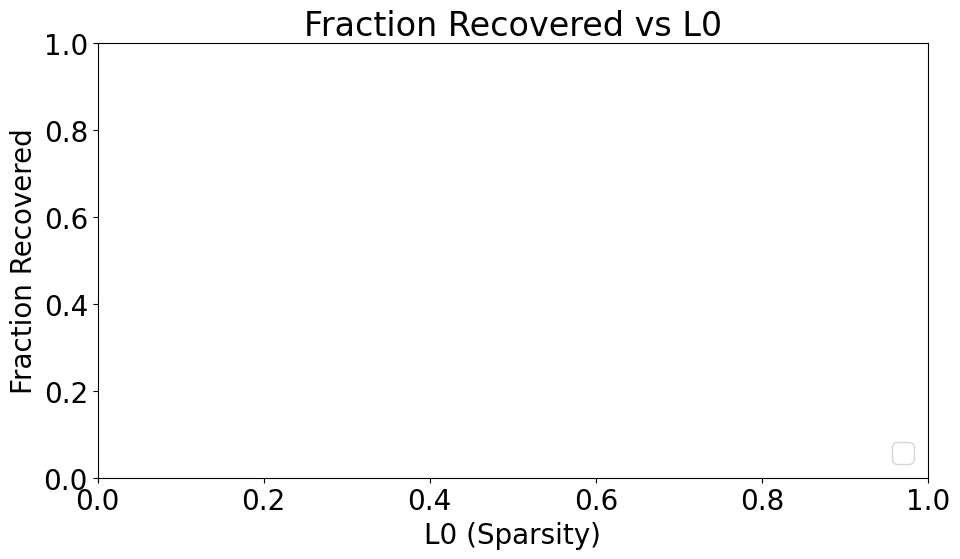

In [14]:
def plot_2var_graph(
    results: dict[str, dict[str, float]],
    custom_metric: str,
    title: str = "L0 vs Custom Metric",
    y_label: str = "Custom Metric",
    xlims: Optional[tuple[float, float]] = None,
    ylims: Optional[tuple[float, float]] = None,
    output_filename: Optional[str] = None,
    legend_location: str = "lower right",
    x_axis_key: str = "l0",
    return_fig: bool = False,
):
    # Extract data from results
    l0_values = [data[x_axis_key] for data in results.values()]
    custom_metric_values = [data[custom_metric] for data in results.values()]

    # Create the scatter plot
    fig, ax = plt.subplots(figsize=(10, 6))

    handles, labels = [], []

    for trainer, marker in TRAINER_MARKERS.items():
        # Filter data for this trainer
        trainer_data = {k: v for k, v in results.items() if v["trainer_class"] == trainer}

        if not trainer_data:
            continue  # Skip this trainer if no data points

        l0_values = [data[x_axis_key] for data in trainer_data.values()]
        custom_metric_values = [data[custom_metric] for data in trainer_data.values()]

        # Plot data points
        scatter = ax.scatter(
            l0_values,
            custom_metric_values,
            marker=marker,
            s=100,
            label=trainer,
            color=TRAINER_COLORS[trainer],
            edgecolor="black",
        )

        # Create custom legend handle with both marker and color
        legend_handle = plt.scatter(
            [], [], marker=marker, s=100, color=TRAINER_COLORS[trainer], edgecolor="black"
        )
        handles.append(legend_handle)

        if trainer in TRAINER_LABELS:
            trainer_label = TRAINER_LABELS[trainer]
        else:
            trainer_label = trainer.capitalize()
        labels.append(trainer_label)

    # Set labels and title
    ax.set_xlabel("L0 (Sparsity)")
    ax.set_ylabel(y_label)
    ax.set_title(title)

    ax.legend(handles, labels, loc=legend_location)

    # Set axis limits
    if xlims:
        ax.set_xlim(*xlims)
    if ylims:
        ax.set_ylim(*ylims)

    plt.tight_layout()

    # Save and show the plot
    if output_filename:
        plt.savefig(output_filename, bbox_inches="tight")

    if return_fig:
        return fig

    plt.show()
    
plt.rcParams.update({"font.size": 20})
plot_2var_graph(plotting_results, "frac_recovered", title="Fraction Recovered vs L0", y_label="Fraction Recovered", output_filename="frac_recovered_vs_l0.png")